In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
raw_data=pd.read_csv("datasets/world-happiness-report-2021.csv")
life_expectancy,per_capita=raw_data['Healthy life expectancy'],raw_data['Logged GDP per capita']

Text(0, 0.5, 'Logged GDP per capita')

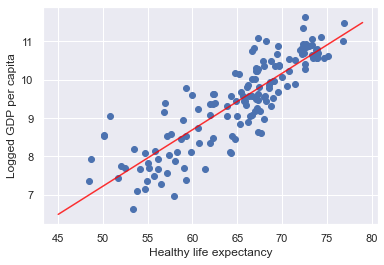

In [3]:
slope,intercept=np.polyfit(life_expectancy,per_capita,1)

x=np.arange(45,80)
y=slope * x + intercept

plt.plot(x,y,color="red",alpha=0.8)
plt.scatter(life_expectancy,per_capita,)
plt.xlabel('Healthy life expectancy')
plt.ylabel('Logged GDP per capita')

In [4]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    
    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x,bs_y,1)

    return bs_slope_reps, bs_intercept_reps

[0.13283799 0.16321211]


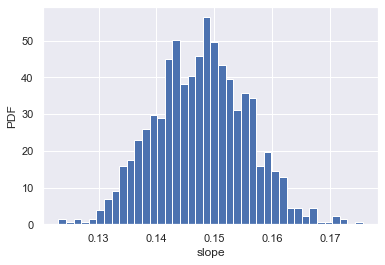

In [5]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps =draw_bs_pairs_linreg(life_expectancy,per_capita,1000)
# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=40, density=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

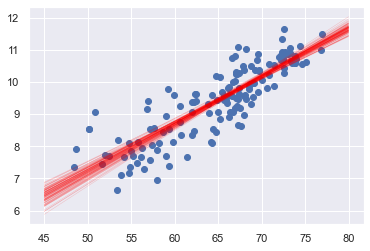

In [7]:
x=np.array([45,80])
for i in range(100):
    _=plt.plot(x,bs_slope_reps[i]*x+bs_intercept_reps[i] , alpha=0.2,linewidth=0.5,color="red")

_=plt.scatter(life_expectancy,per_capita)
plt.show()
